# Basic Linear Regression Model

In [18]:
import sys
ver_info = sys.version
print("This jupyter notebook was executed with:\n{0}".format(ver_info));


This jupyter notebook was executed with:
2.7.14 |Anaconda, Inc.| (default, Nov 20 2017, 18:04:19) 
[GCC 7.2.0]


## Imports

In [19]:
import matplotlib as mpl
import numpy as np
import pandas as pd
from scipy import stats, integrate
import seaborn as sns

import pprint
p = pprint.PrettyPrinter(indent=4)

import config as config

%matplotlib inline
%run utilities.py

## Importing utilities object
+ imports dataset as lists (a training and test set)


In [20]:
util = Utilities({}, use_json=False)
training_list, testing_list = util.get_datasets()


In [21]:
# turning the datasets into pandas DataFrames 

training_DF, testing_DF = util.create_dataframes(training_list, testing_list)

In [29]:
testing_DF[['track_id', 'loudness', 'song_hotttnesss']]

,track_id,loudness,song_hotttnesss
0,TRAKWMU128F425E481,-9.885,0.304170
1,TRBHXNG128F423C6B7,-6.223,0.383734
2,TRBHDIU128F92E49B7,-8.273,0.265861
3,TRBAUXT128F147DF5A,-7.534,0.624024
4,TRAYUKR128F9344BB4,-7.497,0.413740
5,TRAXEML128F934BC04,-4.431,0.375984
6,TRAEQAB128F429C226,-15.015,0.597126
7,TRBFDOH128F933797E,-12.328,0.563755
8,TRAVPOK128F423276A,-15.135,0.597117
9,TRAGHJX128F426F76F,-5.563,0.574693


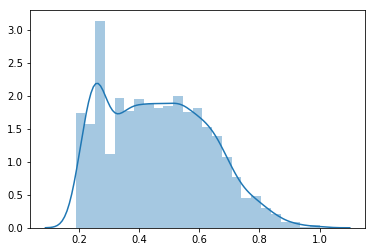

In [4]:
# for funsies 
hot = util.get_hotttnesss_list()
sns.distplot(hot)

## Training the model

In [1]:
from sklearn import linear_model

linear_reg = linear_model.LinearRegression()
# train_predicted, train_expected, train_rscore = train_model(linear_reg, training_set, artist_mapping, num_artists, get_train_error=True)
